In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Lendo data-set
data = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Teste/master/Machine%20Learning%20Models/Datasets/credit_data.csv')

In [8]:
data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
data.shape

(2000, 5)

In [5]:
data.columns

Index(['i#clientid', 'income', 'age', 'loan', 'c#default'], dtype='object')

In [6]:
data.isna().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [7]:
data.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

# Transformacao dos dados

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
# Selencionando o dados do dataframe, da classe que vamos prever e dos dados utilizados
# Para a previsao
previsores = data.iloc[:, 1:4].values
classe = data.iloc[:, 4].values

In [10]:
# Fazendo o tratamento dos dados faltantes, pela estrageia da media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [11]:
# Fazendo a normalizacao dos dados para ficarem na mesma escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

## Dividindo os dados

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.25, random_state=42)

## Treinamento do Modelo de KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [16]:
y_pred = clf.predict(X_test)

## Verificando metricas e matriz de confusao

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.974


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       422
           1       0.93      0.90      0.92        78

    accuracy                           0.97       500
   macro avg       0.96      0.94      0.95       500
weighted avg       0.97      0.97      0.97       500



In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[417   5]
 [  8  70]]


<Figure size 720x504 with 0 Axes>

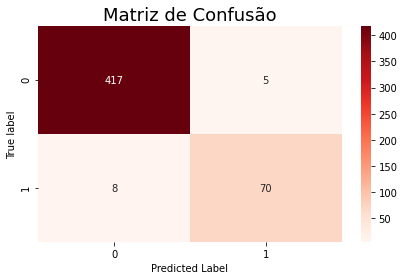

In [36]:
plt.figure(figsize = (10,7))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()
